In [2]:
cd ../src

/home/sankha/Documents/programs/ML/densityNN/src


In [3]:
import numpy as np
import matplotlib.pyplot as plt

from lib.density.utils import divergences, OptimizeNormalKL
from scipy.stats import multivariate_normal, norm

# Sampling from a Distribution

## 1. Sampling from Standard Distributions

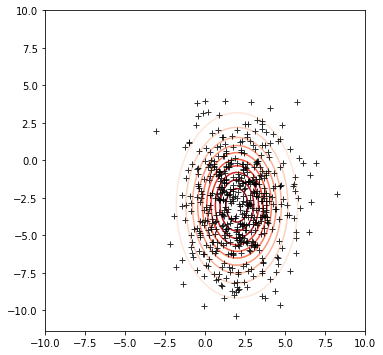

In [14]:
X, Y = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
theta = np.array(list(zip(X.flatten(), Y.flatten())))

mu    = np.array([2, -3])
sigma = np.array([
    [3, 0],
    [0, 8]
])

prob = multivariate_normal.pdf( theta, mu, sigma )
probPlot = prob.reshape(100, 100)

samples = np.random.multivariate_normal( mu, sigma, 500 )

plt.figure(figsize=(5,5))
plt.axes([0.1, 0.1, 0.89, 0.89])
plt.plot(samples[:,0], samples[:,1], '+', mec='k', alpha=0.8)
plt.contour(X, Y, probPlot, cmap=plt.cm.Reds, levels=10)
plt.show()
plt.close('all')

## 2. Rejection Sampling

In this sampling method, we shall generate samples based upon the pdf. Note that this is a particularly slow process, and you may want to stay away from this. Sometimes, however, this might be the only method that is appropriate.

In [52]:
class RejectionSampler():
    
    def __init__(self, pdf, ranges=None):
        self.pdf = pdf
        self.ranges = ranges
        if ranges is not None:
            self.d = len(ranges)
        return
    
    def sample(self, N, ranges = None):
        
        result = None
        
        while (result is None) or len(result) < N:
            assert not ((ranges is None) and (self.ranges is None)), 'Unspecified range'
            if ranges is None:
                ranges = self.ranges
            self.d = len(ranges)
            lower, upper = zip(*ranges)
            x = np.random.uniform( lower, upper, (N, self.d) )
            p_x = self.pdf(x)

            mask = np.random.uniform(size=N) < p_x
            values = x[mask]
            
            if result is None:
                result = values
            else:
                result = np.vstack((result, values))

        result = result[:N]
        return result

In [53]:
rSampler = RejectionSampler( multivariate_normal(mu, sigma).pdf )

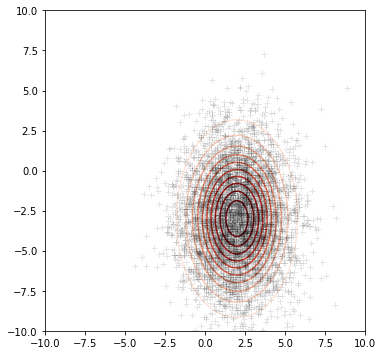

In [59]:
ranges = [[-10, 10], [-10, 10]]
N = 5000
samples = rSampler.sample(N, ranges)

plt.figure(figsize=(5,5))
plt.axes([0.1, 0.1, 0.89, 0.89])
plt.plot(samples[:,0], samples[:,1], '+', mec='k', alpha=0.1)
plt.contour(X, Y, probPlot, cmap=plt.cm.Reds, levels=10)
plt.show()
plt.close('all')